# Linear regression

# Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 4 + 3* x + np.random.rand(100, 1)

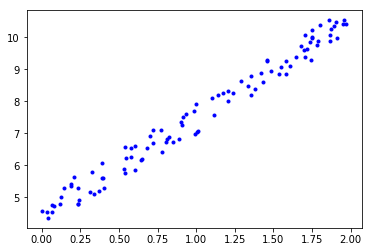

In [2]:
plt.plot(x, y, "b.")

In [3]:
x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b,)).dot(x_b.T).dot(y)
theta_best

array([[4.45355605],
       [3.05146814]])

In [4]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 4.45355605],
       [10.55649234]])

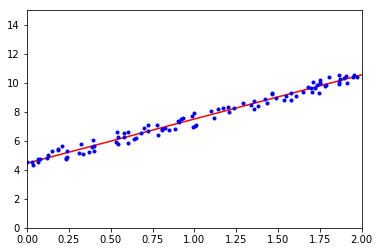

In [5]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.45355605]), array([[3.05146814]]))

In [7]:
lin_reg.predict(x_new)

array([[ 4.45355605],
       [10.55649234]])

# Gradient Descent

## Batch Gradient Descent

In [11]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    grad = 2 / m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * grad

In [12]:
theta

array([[4.45355605],
       [3.05146814]])

## Probablistic Gradient Descent

In [13]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # initialize

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        grad = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * grad

theta

array([[4.44393896],
       [3.05053611]])

### Using Sklearn

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter= 50, penalty= None, eta0= 0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.44820923]), array([3.04812788]))

## Mini-Batch Gradient Descent

# Polynomial Regression

In [16]:
m =100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * (x **2) + x + 2 + np.random.randn(m, 1)

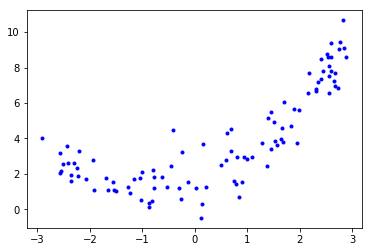

In [18]:
plt.plot(x,y, 'b.')

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_feature.fit_transform(x)
x[0], x_poly[0]

(array([-1.65284617]), array([-1.65284617,  2.73190046]))

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.60149546]), array([[0.97222551, 0.57152693]]))

# Learning Curve

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, x, y):
    x_train, x_val ,y_train, y_val = train_test_split(x, y, test_size= 0.2)
    train_err, val_err = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_pred = model.predict(x_train[:m])
        y_val_pred = model.predict(x_val)
        train_err.append(mean_squared_error(y_train[:m], y_train_pred))
        val_err.append(mean_squared_error(y_val, y_val_pred))
    
    plt.plot(np.sqrt(train_err), "r-+", linewidth = 2, label='train set')
    plt.plot(np.sqrt(val_err), "b-", linewidth =3, label="test set")
        

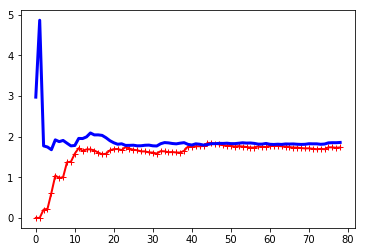

In [31]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, x, y)

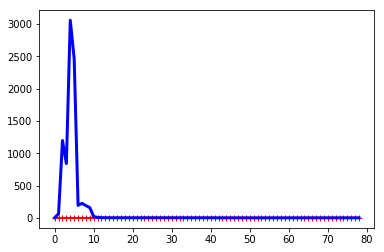

In [33]:
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curve(poly_reg, x, y)